In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

data = {
    "titre": [
        "The Godfather", "Titanic", "The Dark Knight", "Pulp Fiction", "Inception",
        "The Shawshank Redemption", "The Lion King", "The Room", "Avengers: Endgame", "Parasite"
    ],
    "duree": [175, 195, 152, 154, 148, 142, 88, 99, 181, 132],  # en minutes
    "note_imdb": [9.2, 7.9, 9.0, 8.9, 8.8, 9.3, 8.5, 3.7, 8.4, 8.6]
}

df = pd.DataFrame(data)
df

,titre,duree,note_imdb
0,The Godfather,175,9.2
1,Titanic,195,7.9
2,The Dark Knight,152,9.0
3,Pulp Fiction,154,8.9
4,Inception,148,8.8
5,The Shawshank Redemption,142,9.3
6,The Lion King,88,8.5
7,The Room,99,3.7
8,Avengers: Endgame,181,8.4
9,Parasite,132,8.6


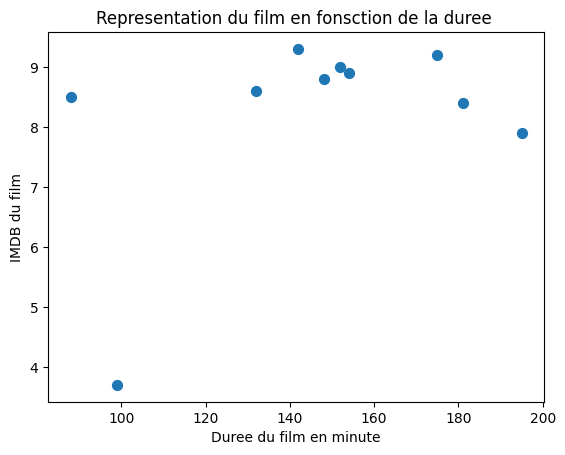

In [29]:
y = df[["duree", "note_imdb"]]

plt.scatter(y["duree"], y["note_imdb"], s= 50)
plt.xlabel("Duree du film en minute")
plt.ylabel("IMDB du film")
plt.title("Representation du film en fonsction de la duree ")
plt.show()

[10376.721, 3316.35375, 599.0146666666667, 352.4783333333333, 159.27166666666665, 109.02666666666666, 37.00666666666666, 18.686666666666664, 2.005, 0.0]


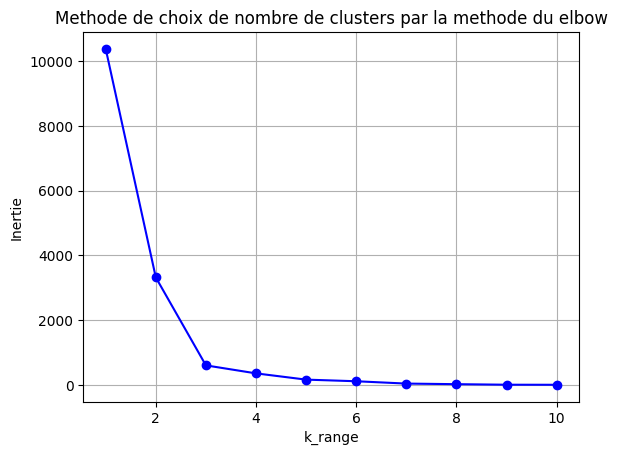

In [30]:
inertias = []
k_range = range(1,11)


for k in k_range:
    kmeans = KMeans(n_clusters= k, random_state= 42)
    kmeans.fit(y)
    inertias.append(kmeans.inertia_)
print(inertias)

plt.plot(k_range, inertias, 'bo-')
plt.xlabel("k_range")
plt.ylabel("Inertie")
plt.title("Methode de choix de nombre de clusters par la methode du elbow")
plt.grid(True)
plt.show()


In [31]:
# choix du cluster a 3 pour notre cas pratique 
kmeans = KMeans(n_clusters= 3, random_state= 42)
kmeans.fit_predict(y)

# labels = kmeans.labels_
centers = kmeans.cluster_centers_
# print(labels)



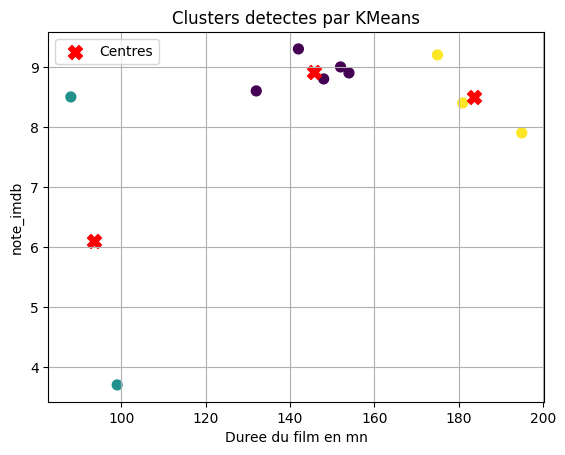

In [32]:
# Courbe de cluster

plt.scatter(y["duree"], y["note_imdb"], c= labels, cmap= "viridis", s=50)
plt.scatter(centers[:, 0], centers[:, 1], c="red", marker= "X", label = "Centres", s= 100)
plt.xlabel("Duree du film en mn")
plt.ylabel("note_imdb")
plt.title("Clusters detectes par KMeans")
plt.legend()
plt.grid(True)
plt.show()